In [1]:
from selenium import webdriver

### Selenium

- 목적 / 장점
    - 셀레니움은 브라우져를 자동화하는 툴. 웹 어플리케이션을 자동화하는 목적으로 만들어졌다.
    - 웹 기반 작업들을 자동화하여 업무 효율성을 높일 수 있다.
    

- 목차
    - 기본 사용법
    - 파일 업로드 / 다운로드 : google vision api 웹페이지에서 실습
    - 스크래핑 : gmarket 베스트셀러 200 아이템 정보 수집, 네이버 메일 데이터 수집
    - 자동화 : 워드프레스 블로그에 자동으로 댓글 작성
    - Selenium을 이용한 이미지 스크린 샷 : 
        - youtube 페이지로 실습
        - pillow 사용 : 파이썬 이미지 처리 패키지
        
    - 과제 : 네이버 기사 크롤링

### 크롬 드라이버 사용법

- 전역에 설정
- 같은 폴더에 드라이버 파일 두기
- path 설정

In [4]:
# 드라이버 실행

driver = webdriver.Chrome()

In [5]:
# 페이지 이동
# driver는 browser 오브젝트라 할 수 있다.

driver.get("http://www.naver.com")

In [46]:
# 브라우져의 윈도우 사이즈 조절
# 반응형 웹페이지에서 사용. 

driver.set_window_size(400, 200) # (가로, 세로)

In [11]:
# 스크롤 조절

script = "window.scrollTo(10000, 1);"
driver.execute_script(script)

In [11]:
# 현재 윈도우 객체를 저장

main_window = driver.current_window_handle
main_window

'CDwindow-9888EE412265769020ED323E7207CEFE'

In [12]:
# 새로운 윈도우 탭 열기

script = "window.open('http://google.com');"
driver.execute_script(script)

In [13]:
driver.current_window_handle

'CDwindow-9888EE412265769020ED323E7207CEFE'

In [14]:
# 윈도우 탭 객체 확인 : 열려 있는 윈도우를 보여준다

windows = driver.window_handles
windows

['CDwindow-9888EE412265769020ED323E7207CEFE',
 'CDwindow-27E0042C313DFDC89081CF532B2A6B93']

In [19]:
# 현재 윈도우 탭 설정

driver.switch_to_window(windows[1])

In [20]:
driver.switch_to_window(main_window)

In [13]:
# 페이지 새로고침

script = "location.reload();"
driver.execute_script(script)

In [16]:
# alert

script = "alert('data science');"
driver.execute_script(script)

In [17]:
alert = driver.switch_to_alert()
alert.text

'data science'

In [20]:
alert.accept()

In [19]:
# confirm

script = "confirm('test selenium');"
driver.execute_script(script)

In [32]:
confirm = driver.switch_to_alert()
confirm.text

'test selenium'

In [33]:
confirm.dismiss() # 취소 버튼 클릭
# confirm.accept() # 확인 버튼 클릭

In [21]:
# input 엘리먼트에 문자열 입력하기, 버튼 클릭하기 

# driver.find_elements : select와 유사하다
# driver.find_element : select_one과 유사하다

driver.find_element_by_css_selector("#query").send_keys("패스트캠퍼스")
driver.find_element_by_css_selector("#search_btn").click()

In [22]:
# 현재 윈도우 닫기

driver.close()

In [23]:
# 브라우져 닫기

driver.quit()

### _파일 업로드_

- google vision api 페이지 활용
- iframe으로 frame을 수정
- 이미지 파일을 업로드
- 웹데이터와 도큐먼트 데이터를 수집한다

In [24]:
# 구글 비전 api 페이지 이동

url = "https://cloud.google.com/vision/"
driver = webdriver.Chrome()
driver.get(url)

In [25]:
# iframe 영역으로 변경
# iframe 영역으로 변경하지 않으면 element가 없다는 메시지가 나온다

iframe = driver.find_element_by_css_selector("#vision_demo_section > iframe")
driver.switch_to_frame(iframe)

In [ ]:
# 메인 프레임으로 변경

# driver.switch_to_default_content()

In [26]:
# 파일 업로드
# 파일 경로를 쓸 때는 "절대경로"로 사용해야 한다.

file_path = "/Users/quartz/Dropbox/TIL/04_web/dog.png"
driver.find_element_by_css_selector("#input").send_keys(file_path)

In [27]:
# 웹 데이터 가져오기

driver.find_element_by_css_selector("#webDetection").click()

In [29]:
results = driver.find_elements_by_css_selector("#card > .container > .row")[:5]
results

for result in results:
    print(result.find_element_by_css_selector('.name').text, \
          result.find_element_by_css_selector('.score').text)

French Bulldog 1.29174
Bulldog 1.27976
Boston Terrier 1.27667
Soft-coated Wheaten Terrier 1.01785
Bull Terrier 0.97157


In [64]:
# 웹 데이터 긁어오기

results = driver.find_elements_by_css_selector("#card > .container > .row")[:15]

for result in results:
    print(result.find_element_by_css_selector('.name').text, \
          result.find_element_by_css_selector('.score').text)

French Bulldog 1.29047
Boston Terrier 1.28066
Bulldog 1.27885
Bull Terrier 1.07139
Soft-coated Wheaten Terrier 0.98682
Puppy 0.8898
Border Collie 0.78608
Terrier 0.6546
Pet 0.6301
Brindle 0.5639
Dog breed 0.4977
Breed 0.4297
Veterinarian 0.4175
Black Brindle 0.4112
Dog 0


In [30]:
# 문자열 데이터 가져오기

driver.find_element_by_css_selector("#fullTextAnnotation").click()

In [32]:
fieldsets = driver.find_elements_by_css_selector(".page > \
.container.style-scope.vs-document > fieldset")
len(fieldsets)

2

In [33]:
documents = [] # 문장 2개가 들어간다

for fieldset in fieldsets:
    words = fieldset.find_elements_by_css_selector(".container .word")
    word_list = []
    for word in words:
        word = word.text.replace(" ", "")
        word_list.append(word)
    documents.append(" ".join(word_list))
    
documents

['In the dog house', "' 인기를 잃다 , 면목을 잃다"]

In [34]:
driver.quit()

### _스크래핑_

- gmarket 베스트셀러 아이템 200개

In [3]:
from selenium import webdriver

In [4]:
import numpy as np
import pandas as pd

In [5]:
url = "http://corners.gmarket.co.kr/Bestsellers"
driver = webdriver.Chrome()
driver.get(url)

In [7]:
items = driver.find_elements_by_css_selector(".best-list:nth-child(3) > ul > li")
type(items)

list

In [8]:
driver.quit()

In [55]:
dict_list = []
for item in items:
    dict_list.append({
        "title": item.find_element_by_css_selector('.itemname').text,
        "s-price": item.find_element_by_css_selector('.s-price').text\
        .split(" ")[0].replace(",","")[:-1],
        "o-price": item.find_element_by_css_selector('.o-price').text\
        .split(" ")[0].replace(",","")[:-1],
        "link": item.find_element_by_css_selector('.itemname').get_attribute("href"),
    })
df = pd.DataFrame(dict_list)    
df

,link,o-price,s-price,title
0,http://item.gmarket.co.kr/Item?goodscode=12775...,26300,7900,2+1 여름 덧신 40켤레 골지 면 페이크삭스 발목 양말
1,http://item.gmarket.co.kr/Item?goodscode=14425...,80000,29900,(단독한정판매)캐리비안베이 종일권+자켓대여+에버랜드 오후 5시 이용권(7/21~8/...
2,http://item.gmarket.co.kr/Item?goodscode=14283...,29900,13900,[롯데푸드]의성마늘프랑크 70gx20개/핫바/간식/소시지/소세지
3,http://item.gmarket.co.kr/Item?goodscode=88173...,15000,5900,한정특가 절대 번지지 않는 붓펜 아이라이너
4,http://item.gmarket.co.kr/Item?goodscode=11552...,21600,6500,초특가브랜드3단자동우산/아동/장우산/양산/돌답례품
5,http://item.gmarket.co.kr/Item?goodscode=16609...,25900,7900,[속옷미인]잠옷/홈웨어/파자마/여성잠옷/선물/원피스/여름잠옷
6,http://item.gmarket.co.kr/Item?goodscode=35350...,26300,7900,[고스트리퍼블릭]후기검증 200% S/S 베스트 반팔티셔츠 M-XXL
7,http://item.gmarket.co.kr/Item?goodscode=75124...,19600,5900,쏭스타일 롱티.루즈핏.박스티.신상특가
8,http://item.gmarket.co.kr/Item?goodscode=90810...,14000,10000,업그레이드 (1+1)원터치 애니멀 텀블러(보온.보냉병)
9,http://item.gmarket.co.kr/Item?goodscode=67170...,39000,14900,[아디다스]아디다스 에스트로 신형입고 인기컬러 긴급재입고


In [110]:
# 빈 칸 채워넣기

is_nodata = df["o-price"] == ""
df["o-price"][is_nodata] = df["s-price"][is_nodata]

In [119]:
# 할인율 컬럼 추가

df["discount_rate"] = round((1 - df["s-price"].astype(int) / df["o-price"].astype(int)) * 100, 1)
df["discount_rate"] = df["discount_rate"].astype('str')
df["discount_rate"] += "%"
df["discount_rate"].tail()

195    54.2%
196    69.7%
197    69.8%
198    68.2%
199    70.0%
Name: discount_rate, dtype: object

In [56]:
driver.quit()

### _네이버 메일 크롤링_

- 네이버 페이지로 이동
- 아이디 패스워드를 입력
- 로그인 버튼을 클릭
- 메일 페이지로 이동
- 메일 페이지에서 메일 데이터 수집

In [57]:
main_url = "http://naver.com"
mail_url = "https://mail.naver.com"

In [58]:
# 네이버 페이지로 이동

driver = webdriver.Chrome()
driver.get(main_url)

In [62]:
# 아이디, 패스워드 입력

driver.find_element_by_css_selector("#id").send_keys("syh602")
driver.find_element_by_css_selector("#pw").send_keys("")

In [63]:
# 로그인 버튼 클릭

driver.find_element_by_css_selector(".btn_login > input[type=submit]").click()

In [64]:
# 메일 페이지로 이동

driver.get(mail_url)

In [66]:
mails = driver.find_elements_by_css_selector(".mailList > li")

In [67]:
for mail in mails[:10]:
    name = mail.find_element_by_css_selector(".name > a").text
    title = mail.find_element_by_css_selector(".mail_title").text
    print(name)

네이버페이
쿠팡
경향하우징페어
케이팜 귀농귀촌 박람..
syh602@gmail.com
운영사무국
청년유니온
밀알복지재단
dothome
밀알복지재단


In [139]:
"https://mail.naver.com/?n=1529567449175&v=f#{"fClass":"list","oParameter":{"page":"2","sortField":1,"sortType":0,"folderSN":"0","type":"","isUnread":false,"viewMode":"conversation","startOffset":118,"pageSize4SeeMore":100}}"

SyntaxError: invalid syntax (<ipython-input-139-6bb947555b47>, line 1)

In [71]:
driver.quit()

### _워드프레스 댓글 자동화_

- https://
- 2개의 계정, 2개의 메시지, 2개의 게시글에 총 8개의 댓글을 자동으로 작성
- 게시물의 링크를 크롤링
- 각 게시물로 가서 댓글 작성
    - 댓글 작성 레이어 클릭
    - 댓글 작성
    - 이메일, 이름 추가
    - 댓글 작성 버튼 클릭

In [72]:
url = "https://radajin661456067.wordpress.com/"
driver = webdriver.Chrome()
driver.get(url)

In [73]:
links = []
articles = driver.find_elements_by_css_selector("#main > article")

for article in articles:
    links.append(
        article.find_element_by_css_selector(".entry-title > a").get_attribute("href")
    )
links

['https://radajin661456067.wordpress.com/2018/06/21/%ed%85%8c%ec%8a%a4%ed%8a%b8/',
 'https://radajin661456067.wordpress.com/2018/06/21/%ec%b2%ab-%eb%b2%88%ec%a7%b8-%eb%b8%94%eb%a1%9c%ea%b7%b8-%ea%b8%80/']

In [74]:
# 링크로 이동

driver.get(links[0])

In [75]:
# 스크롤 내리기

script = "window.scrollTo(0, 10000)"
driver.execute_script(script)

In [76]:
# 댓글창 클릭
driver.find_element_by_css_selector("#comment-form-comment").click()

In [77]:
# 댓글 내용 작성
driver.find_element_by_css_selector("#comment").send_keys("하나씩")

In [78]:
# 스크롤 내리기
script = "window.scrollTo(0, 10000)"
driver.execute_script(script)

In [79]:
# 이메일 이름 입력

driver.find_element_by_css_selector("#email").clear() #?
driver.find_element_by_css_selector("#email").send_keys("1234")
driver.find_element_by_css_selector("#author").clear()
driver.find_element_by_css_selector("#author").send_keys("1234")

In [80]:
# 댓글 작성 버튼 클릭
driver.find_element_by_css_selector("#comment-submit").click()

In [82]:
import time

In [81]:
def write_comment(driver, link, msg, email, name):
    driver.get(link)
    script = "window.scrollTo(1, 10000)"
    driver.execute_script(script)
    time.sleep(1)
    driver.find_element_by_css_selector("#comment-form-comment").click()
    time.sleep(1)
    driver.find_element_by_css_selector("#comment").send_keys("하나씩")
    time.sleep(1)
    driver.find_element_by_css_selector("#email").clear()
    driver.find_element_by_css_selector("#email").send_keys(email)
    driver.find_element_by_css_selector("#author").clear()
    driver.find_element_by_css_selector("#author").send_keys(name)

    driver.find_element_by_css_selector("#comment-submit").click()

In [171]:
users = [
    {"name":"sujin", "email":"jingjing"},
    {"name":"seokyeong", "email":"quartz"},
]

msgs = ["우리 존재 화이팅", "아자뵤오"]

In [176]:
for user in users:
    for msg in msgs:
        for link in links:
            print(user["name"], user["email"], msg, link)
            try:
                write_comment(driver, link, msg, user["email"], user["name"])
            except:
                print(user)

sujin jingjing 우리 존재 화이팅 https://radajin661456067.wordpress.com/2018/06/21/%ed%85%8c%ec%8a%a4%ed%8a%b8/
{'name': 'sujin', 'email': 'jingjing'}
sujin jingjing 우리 존재 화이팅 https://radajin661456067.wordpress.com/2018/06/21/%ec%b2%ab-%eb%b2%88%ec%a7%b8-%eb%b8%94%eb%a1%9c%ea%b7%b8-%ea%b8%80/
{'name': 'sujin', 'email': 'jingjing'}
sujin jingjing 아자뵤오 https://radajin661456067.wordpress.com/2018/06/21/%ed%85%8c%ec%8a%a4%ed%8a%b8/
{'name': 'sujin', 'email': 'jingjing'}
sujin jingjing 아자뵤오 https://radajin661456067.wordpress.com/2018/06/21/%ec%b2%ab-%eb%b2%88%ec%a7%b8-%eb%b8%94%eb%a1%9c%ea%b7%b8-%ea%b8%80/
{'name': 'sujin', 'email': 'jingjing'}
seokyeong quartz 우리 존재 화이팅 https://radajin661456067.wordpress.com/2018/06/21/%ed%85%8c%ec%8a%a4%ed%8a%b8/
{'name': 'seokyeong', 'email': 'quartz'}
seokyeong quartz 우리 존재 화이팅 https://radajin661456067.wordpress.com/2018/06/21/%ec%b2%ab-%eb%b2%88%ec%a7%b8-%eb%b8%94%eb%a1%9c%ea%b7%b8-%ea%b8%80/
{'name': 'seokyeong', 'email': 'quartz'}
seokyeong quartz 아자뵤오 https

In [84]:
driver.quit()

### _이미지 스크린샷_

- youtube

In [83]:
import time
from selenium import webdriver
from PIL import Image as pil

In [85]:
url = "https://www.youtube.com/watch?v=9Ezsz6uOeq4"
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1) # 로딩 속도에 따라서 스크린샷(파일)이 깨지는 상황을 방지하기 위해서.

In [86]:
# 이미지 스크린샷

# 스크린샷을 저장하는 코드 


for idx in range(1, 6):
    time.sleep(1)
    driver.save_screenshot("screenshot_"+str(idx)+".png")

In [87]:
driver.quit()

(1200, 719)


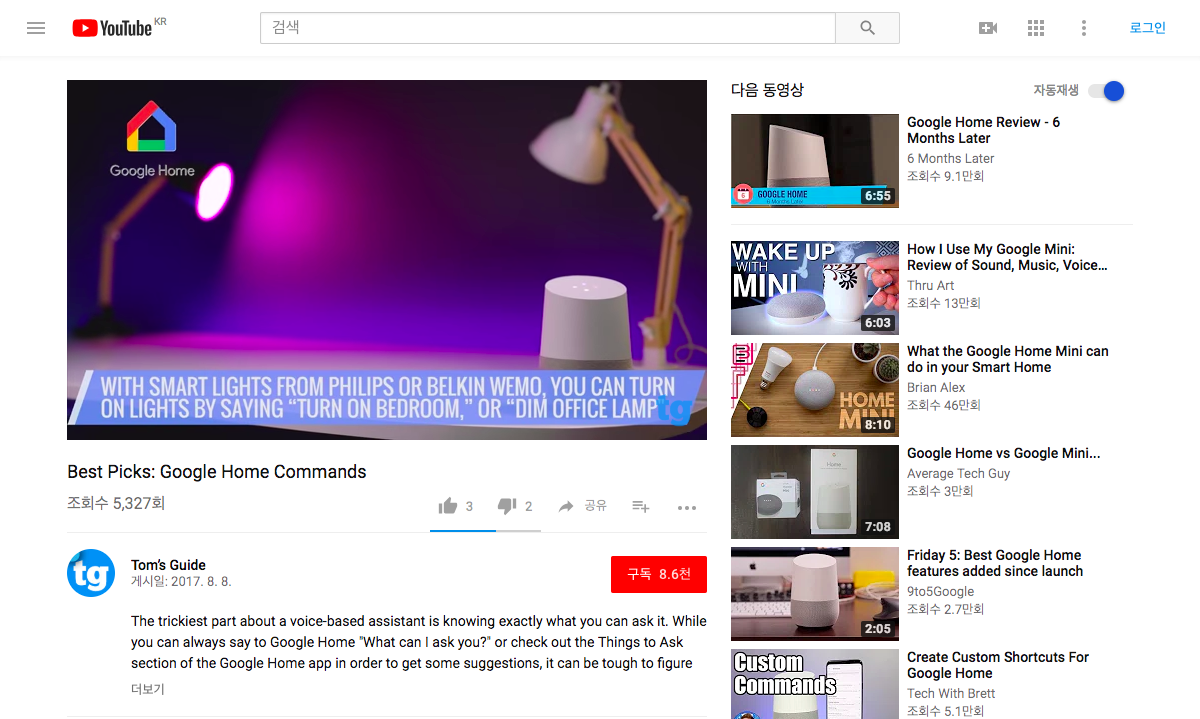

In [88]:
# 이미지 띄우기

pil_im = pil.open("screenshot_1.png")
print(pil_im.size)
pil_im

In [26]:
url = "https://www.youtube.com/watch?v=SESuctdE9vM"
driver = webdriver.Chrome()
driver.get(url)

In [27]:
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size

({'x': 80, 'y': 80}, {'height': 480, 'width': 854})

In [28]:
driver.quit()

In [30]:
# top, button, left, right 값 출력

left = location['x']
top = location['y']
right = location['x'] + size['width']
button = location['y'] + size['height']

area = (left, top, right, button)
area

(80, 80, 934, 560)

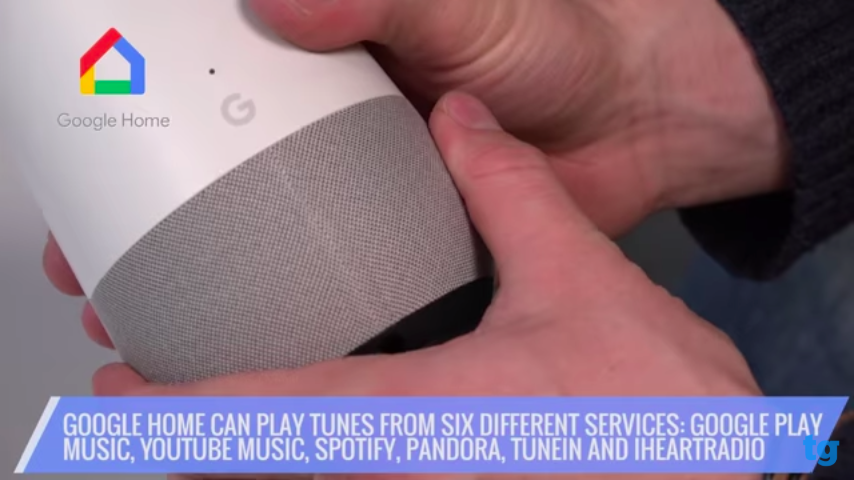

In [32]:
# pillow 이미지 크롭

pil_im = pil.open("screenshot_2.png")
pil_im = pil_im.crop(area)
pil_im

In [33]:
# pillow 이미지 저장

pil_im.save("cropped screenshot.png")

In [37]:
# 하단의 재생 영역 자르기

url = "https://www.youtube.com/watch?v=SESuctdE9vM"
driver = webdriver.Chrome()
driver.get(url)

element = driver.find_element_by_css_selector(".ytp-chrome-bottom")
location = element.location
size = element.size
location, size

({'x': 79, 'y': 401}, {'height': 39, 'width': 616})

In [38]:
left = location['x']
top = location['y']
right = location['x'] + size['width']
button = location['y'] + size['height'] - 39

area = (left, top, right, button)
area

(79, 401, 695, 401)

In [40]:
driver.save_screenshot("screenshot00.png")

True

In [56]:
driver.quit()

In [69]:
# 실습2 : 이미지 스크린샷, 비전 API로 이미지 분석하기

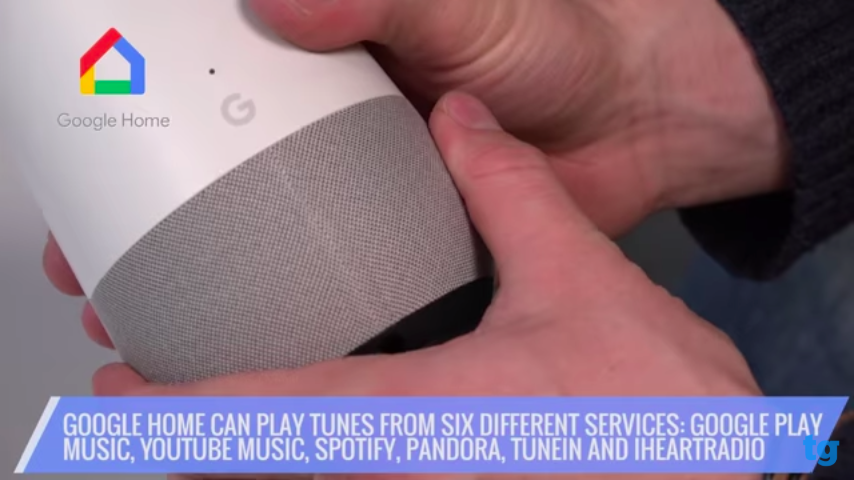

In [68]:
# 썸네일

pil_im = pil.open("cropped screenshot.png")
pil_im

In [71]:
pil_im.thumbnail((300, 200))
pil_im.size

(300, 168)

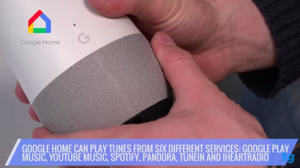

In [72]:
pil_im

In [76]:
driver.quit()